# 线性回归

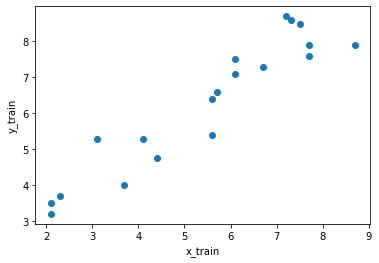

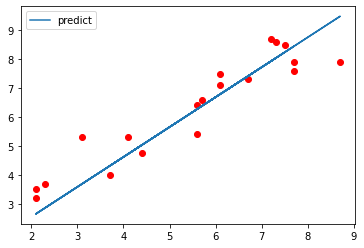

In [3]:
import torch
import torch.nn as nn
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from torch.autograd import Variable


# Hyper Parameters
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.001

x_train = np.array([[2.3], [4.4], [3.7], [6.1], [7.3], [2.1],[5.6], [7.7], [8.7], [4.1],

                    [6.7], [6.1], [7.5], [2.1], [7.2],

                    [5.6], [5.7], [7.7], [3.1]], dtype=np.float32)

#xtrain生成矩阵数据

y_train = np.array([[3.7], [4.76], [4.], [7.1], [8.6], [3.5],[5.4], [7.6], [7.9], [5.3],

                    [7.3], [7.5], [8.5], [3.2], [8.7],

                    [6.4], [6.6], [7.9], [5.3]], dtype=np.float32)
plt.figure() 
#画图散点图
plt.scatter(x_train,y_train)
plt.xlabel('x_train')
#x轴名称
plt.ylabel('y_train')
#y轴名称
#显示图片
plt.show()

# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression(input_size, output_size)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the Model 
for epoch in range(num_epochs):
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    targets = Variable(torch.from_numpy(y_train))

    # Forward + Backward + Optimize
    optimizer.zero_grad()  
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
#     if (epoch+1) % 5 == 0:
#         print ('Epoch [%d/%d], Loss: %.4f' 
#                %(epoch+1, num_epochs, loss.data[0]))
        
# Plot the graph



model.eval()
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train, y_train, 'ro')
plt.plot(x_train, predicted, label='predict')
plt.legend()
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable


# Hyper Parameters 
input_size = 784
num_classes = 10
num_epochs = 10
batch_size = 50
learning_rate = 0.001

# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LogisticRegression(input_size, num_classes)

# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Training the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
                   % (epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))

# Test the Model
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

# Save the Model
torch.save(model.state_dict(), 'model.pkl')